- low level vision을 실생활에서는 잘 안 쓴다. 써봤자 자동차 번호판 인식


- OCR에서 low level vision이 얼마나 도움이 되는지 확인해보자.
    - 가장 많이 쓰는 OCR 프로그램은 Tesseract 다.
    - 설치한다 (Additional language에서 Korean 선택)


- 아나콘다 프롬프트에서 `pip` 명령어로 `pytesseract`를 설치한다.
     - pip install pytesseract

# 오늘 할 것
# 1. 문자 인식
- 영상에서 문자열 추출하기

# 2. 도형 인식하기

# 3. 기하학적 변형
- 뒤집기
- 확대/축소하기
- 자르기
- 이동하기
- 회전하기
- 퍼스펙티브

# 1. 문자 인식

In [1]:
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

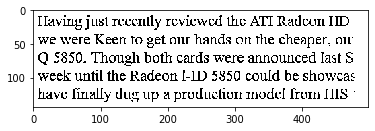

True

In [3]:
image = cv2.imread('ocr-text.png',0)   
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

In [ ]:
import pytesseract

#  `.image_to_string()`
- 영상을 문자열로 변환한다
- pytesseract.image_to_string(이미지)

In [4]:
#환경변수를 따로 설정해주지 않았으므로 tesseract가 설치된 경로를 지정해주어야한다.
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

#영상을 문자로 변환
s = pytesseract.image_to_string('out.png')
print(s)

Having just recently reviewed the ATI Radeon HD

we were Keen to get our hands on the cheaper, ou
Q 5850. Though both cards were announced last S
week until the Radeon 1-ID 5850 could be showcas
have finally dug up a production model from HIS :


In [7]:
#adaptiveThreshold 적용하지 않고 변환해보기
s2 = pytesseract.image_to_string('ocr-text.png')
print(s2)

Having just recently reviewed the ATI Radeo
we were Keen to get our hands on the cheape
Q 5850. Though both cards were announced
week until the Radeon 1-ID 5850 could be she
have finally dug up a production model from


오른쪽 단이 잘렸다. --> **전처리**의 중요성을 확인할 수 있다.

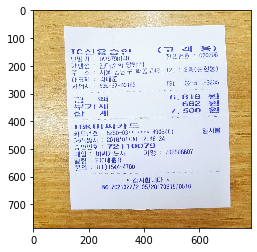

단말기 : 1679790148

기맹접 : 김태준의 탕탕집

주 소 : 서울 강남구 학동로4길
대표자 ㆍ 김태준

사업자 : 536-37-00183

 

글   으레           6ㄷ.ㅁ818 이
츠가세             68
를 계        7. 500 원
배셔|씨카드

：: 카드번호 : 6250-03-**-4903(6)      일시불

 

거래일시 : 2018/01/30 12.46:24
승인번호 : 72 1 1007요

알림 : 600매출표
문의 : 1터)1544-4700

  

1 : 02-511-3235

매입 : 비씨카드사    가맹 : 7/986606607

* 감사합니다 *＊
0617021027/2.05/20170215/0510

 

 

16슨!율슬은   (고 거 용) 를
전표번  :     로

12, ｌ,2충(논현동)


In [20]:
#영수증 이미지로도 해본다.
s = pytesseract.image_to_string('rcpt2.png', lang = 'kor')  #한글임을 명시해줘야한다
img = cv2.imread('rcpt2.png')
imshow("", img)
print(s)

나쁘지는 않지만 썩 맘에 들지도 않는다. 역시나 전처리를 해줘야한다.

(lang = 'kor'로 설정했더니 영어를 인식하지 못하는 문제도 발생했다)

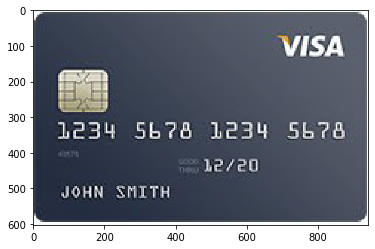

pier

L234 5678 Les Sb?8
raed

JOHN SMITH


In [12]:
#신용카드 이미지로도 해본다.
s = pytesseract.image_to_string('creditcard01.png')
img = cv2.imread('creditcard01.png')
imshow("", img)
print(s)

제대로 인식을 못한다. --> 바이너리로 변환 후 노이즈를 제거해주어야 한다.

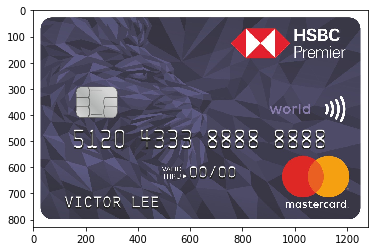

HSBC
Premier

f= world »)))

Shon nwo refs Nakai oka iols).s
reer ele)
VIC vOR@REE Ve


In [14]:
s = pytesseract.image_to_string('creditcard02.png')
img = cv2.imread('creditcard02.png')
imshow("", img)
print(s)

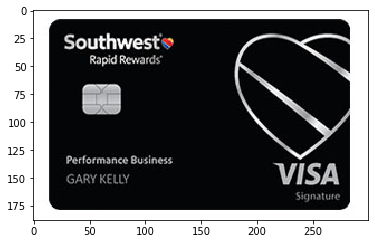

Be
Rapid Rewards


In [15]:
s = pytesseract.image_to_string('creditcard03.png')
img = cv2.imread('creditcard03.png')
imshow("", img)
print(s)

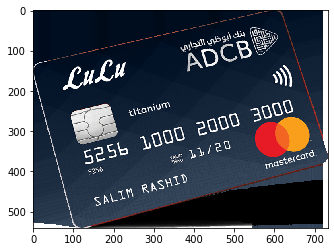

ec we: eRe

ae i
»)))

aes ee

ee

eee evry

Ne

spi ,


In [16]:
s = pytesseract.image_to_string('creditcard04.png')
img = cv2.imread('creditcard04.png')
imshow("", img)
print(s)

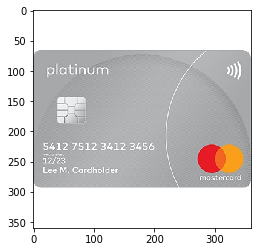

platinum »))

 

5412 7512 3412 3456
Ete}
Pe Perel clio

 

Bessa


In [17]:
s = pytesseract.image_to_string('creditcard05.png')
img = cv2.imread('creditcard05.png')
imshow("", img)
print(s)

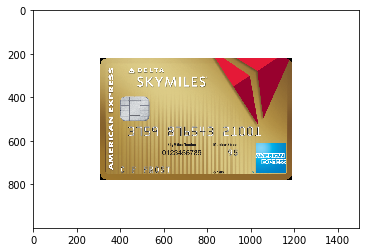

ESA) iLes

ilies

HALA ALN om L
56789 (
7 i i a =

n
‘1
fy

o
ra
ad

u 5
4

C

)

4

uy

3

C


In [18]:
s = pytesseract.image_to_string('creditcard06.png')
img = cv2.imread('creditcard06.png')
imshow("", img)
print(s)

전처리 해주기 전에는 이미지에 상관없이 거기서 거기다.

# 2. 도형 인식하기

# `.Canny()`
- 외곽선 정보들을 추출한다.
    - 거의 최외곽만 추출한다.
    - 변화량 뿐만 아니라 연결된 선분들까지 따진다.
    - 바이너리로 리턴한다.
- cv2.Canny(이미지, 미니멈 엣지, 맥시멈 엣지)
    - 미니멈 엣지: 이것보다 작은 건 버리겠다.
    - 맥시멈 엣지: 이것보다 큰 건 무조건 엣지로 보겠다.
    - 미니멈, 맥시멈 범위는 내부값이다 (0~255 아님)
        - 하이퍼파라미터: 변화시키면서 최적의 값을 찾아야 함

## 2-1 예제1: 책이 몇 권일까?

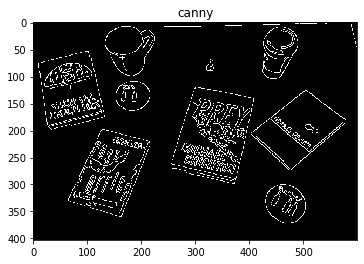

In [24]:
#책이 몇권일까?
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

#canny 엣지를 딴다.
edged = cv2.Canny(gray, 10, 250)

imshow("canny", edged)   #외곽선 정보들만 추출이 된다.

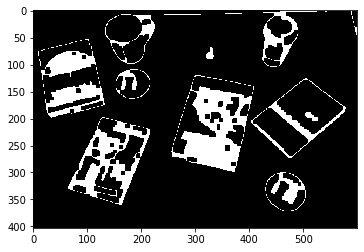

In [26]:
#회선마스크 생성
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
#침식 후 팽창
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

imshow("", closed)

I found 4 books in that image!


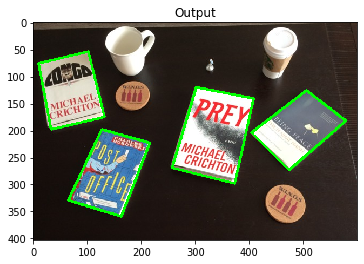

In [25]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#컨투어를 찾으면서 원본 영상을 바꾸기 때문에 .copy()하여 사용한다.
total = 0

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)   #보통 0.02 ~ 0.03

    if len(approx) == 4:   #사각형인지 확인
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)   # 0은 바깥 것만, 1은 안쪽 것만, -1은 모두
        total += 1
print("I found {0} books in that image!".format(total))
imshow("Output", image)

## 2-2 예제2: 바둑돌이 몇 개일까?

# `.HoughCircles()`
- 원을 찾아준다.
    - 엣지 기반 연산
    - 쭉 스캐닝을 하면서 원 후보들을 찾는다.
    - 겹쳐져있는 원도 찾을 수 있다.
    - canny edge 연산을 내부적으로 수행하기 때문에 따로 해주지 않아도 된다.
    - 리턴값은 찾아진 원의 중심점 좌표와 반지름
- cv2.HoughCircles(이미지, 함수, 출력비율, 최소거리, param1 = , param2 = , minRadius = , maxRadius = )
    - 함수: cv2.HOUGH_GRADIENT 엣지 기반(1차 미분값)
    - 출력비율(역수): 1이면 그대로, 2이면 1/2
    - 최소거리(픽셀): 인식 된 원 중심 간 거리가 이 값 미만이면 한 개의 원으로 인식
    - **param1**: 엣지 판단 역치; 이 값보다 클 때만 엣지로 본다.
    - **param2**: 원 판단 기준; 값이 작으면 별로 원 안 같아도 원으로, 값이 크면 정말 원 같은 것만 원으로
    - minRadius, maxRadius: 노이즈 거르기용 파라미터

In [47]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'   #일단 검은돌로 초기화
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    #이미지에서 0과 1의 개수를 센다.
    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('stone.png')

img = cv2.medianBlur(img, 5)    #low level vision은 거의 항상 블러해줘야한다. 원래는 그레이로 바꾸고 블러하는 게 낫다(컬러로 할 필요가 없기 때문)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨


#원 찾아주는 전용 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
print(circles)
print(len(*circles))

[[[295.5 257.5  28.4]
  [359.5 338.5  28.6]
  [301.5 138.5  27.9]
  [356.5 272.5  29.1]
  [239.5 273.5  28.6]
  [176.5 262.5  28.1]
  [256.5 329.5  29.4]
  [176.5 132.5  28. ]
  [426.5 272.5  28.5]
  [240.5 136.5  28.8]
  [308.5  77.5  27.5]
  [263.5 387.5  29.2]
  [241.5 199.5  28. ]
  [179.5 203.5  28. ]
  [ 83.5 132.5  27.2]
  [324.5 382.5  29.4]
  [367.5 148.5  28.4]
  [249.5  69.5  29.1]]]
18


[(255, 3119), (0, 17)]
[(0, 2464), (255, 900)]
[(255, 3113), (0, 23)]
[(255, 3358), (0, 6)]
[(255, 3138), (0, 226)]
[(255, 2945), (0, 191)]
[(255, 3140), (0, 224)]
[(0, 2646), (255, 490)]
[(0, 2393), (255, 743)]
[(255, 3234), (0, 130)]
[(0, 2621), (255, 515)]
[(0, 2726), (255, 638)]
[(0, 2606), (255, 530)]
[(0, 2697), (255, 439)]
[(255, 2859), (0, 57)]
[(255, 3159), (0, 205)]
[(0, 2447), (255, 689)]
[(0, 2717), (255, 647)]


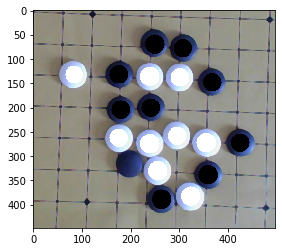

In [48]:
circles = np.uint16(np.around(circles))   #드로잉을 위해 16비트로 변환

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    crop_img = img[y - r:y + r, x - r:x + r]    #원을 포함한 박스를 크롭
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)  #-1: 채우라는 뜻
    else :
        cv2.circle(img, (x, y),int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

[[[513.5 123.5  26.4]
  [331.5 258.5  26.4]
  [208.5 135.5  26.8]
  [384.5 322.5  27. ]
  [439.5 316.5  27. ]
  [258.5 451.5  27. ]
  [381.5  82.5  27.1]
  [431.5 136.5  27.1]
  [377.5 135.5  26.7]
  [318.5 314.5  27.1]
  [321.5 437.5  27. ]
  [327.5  74.5  26. ]
  [195.5 328.5  26.8]
  [266.5 177.5  25.8]
  [315.5 381.5  27.1]
  [390.5 259.5  26.8]
  [259.5 391.5  29.3]
  [195.5 255.5  27.2]
  [447.5 377.5  27.1]
  [500.5 449.5  27.4]
  [390.5 199.5  29.4]
  [387.5 385.5  27.1]
  [503.5 323.5  26.6]
  [440.5 195.5  27.1]
  [382.5 448.5  26.1]
  [204.5 191.5  27.1]
  [322.5 134.5  28.8]
  [447.5 249.5  25.7]
  [261.5 245.5  29.9]
  [249.5 316.5  28.2]
  [265.5  72.5  25.2]
  [503.5 203.5  27.1]
  [198.5 386.5  28.5]
  [139.5 135.5  28. ]
  [314.5 205.5  28. ]
  [440.5  73.5  27.1]
  [194.5  49.5  31.4]]]
37
[(255, 2656), (0, 48)]
[(255, 2595), (0, 109)]
[(0, 2341), (255, 575)]
[(255, 2856), (0, 60)]
[(0, 2394), (255, 522)]
[(0, 2508), (255, 408)]
[(0, 2408), (255, 508)]
[(0, 2405), (25

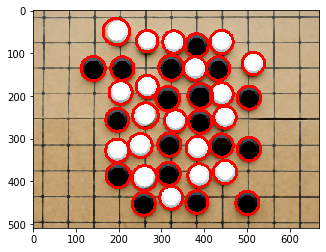

In [51]:
#다른 바둑판 이미지로도 해본다.
img = cv2.imread('stone2.png')

img = cv2.medianBlur(img, 5)    #low level vision은 거의 항상 블러해줘야한다. 원래는 그레이로 바꾸고 블러하는 게 낫다(컬러로 할 필요가 없기 때문)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨


#원 찾아주는 전용 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
print(circles)
print(len(*circles))

circles = np.uint16(np.around(circles))   #드로잉을 위해 16비트로 변환

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    crop_img = img[y - r:y + r, x - r:x + r]    #원을 포함한 박스를 크롭
    txt, threshold = detect_weiqi(crop_img)
    
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    
   # if txt == 'black' :  
        #cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)  #-1: 채우라는 뜻
   # else :
        #cv2.circle(img, (x, y),int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

In [42]:
#동전 사진으로도 해본다.
img = cv2.imread('coin.png')

img = cv2.medianBlur(img, 5)    #low level vision은 거의 항상 블러해줘야한다. 원래는 그레이로 바꾸고 블러하는 게 낫다(컬러로 할 필요가 없기 때문)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨


#원 찾아주는 전용 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
print(circles)
print(len(*circles))

[[[275.5 255.5  32.3]
  [162.5 274.5  29.2]
  [231.5 324.5  31.9]
  [313.5 156.5  31.9]
  [191.5 169.5  27.5]]]
5


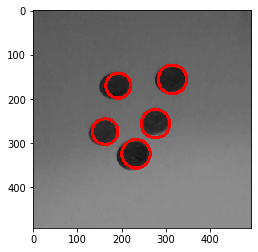

In [43]:
circles = np.uint16(np.around(circles))   #드로잉을 위해 16비트로 변환

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    #crop_img = img[y - r:y + r, x - r:x + r]    
    #txt, threshold = detect_weiqi(crop_img)
    
    #if txt == 'black' :  
        #cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)  #-1: 채우라는 뜻
    #else :
        #cv2.circle(img, (x, y),int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

In [44]:
#경계가 불분명한 동전 사진으로도 해본다.
img = cv2.imread('water_coins.jpg')

img = cv2.medianBlur(img, 5)    #low level vision은 거의 항상 블러해줘야한다. 원래는 그레이로 바꾸고 블러하는 게 낫다(컬러로 할 필요가 없기 때문)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨


#원 찾아주는 전용 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
print(circles)
print(len(*circles))

[[[ 47.5 276.5  23.9]
  [ 63.5  37.5  23.9]
  [ 47.5  97.5  24. ]
  [216.5 105.5  23.9]
  [176.5  84.5  23.8]
  [161.5 137.5  24.5]
  [ 27.5 192.5  23.8]
  [ 22.5 137.5  23.8]
  [204.5 155.5  23.5]
  [177.5 289.5  24.3]
  [134.5  52.5  23.2]
  [196.5 201.5  24.3]
  [173.5 242.5  24.6]
  [ 94.5 198.5  24. ]
  [131.5 288.5  23.2]
  [151.5 191.5  23.5]
  [ 63.5 163.5  24. ]]]
17


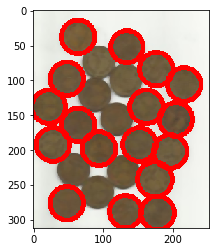

In [45]:
circles = np.uint16(np.around(circles))   #드로잉을 위해 16비트로 변환

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    #if txt == 'black' :  
        #cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)  #-1: 채우라는 뜻
    #else :
        #cv2.circle(img, (x, y),int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

# 3. 기하학적 변형
- 뒤집기
- 확대/축소하기
- 자르기
- 이동하기
- 회전하기
- 스케일링하기(퍼스펙티브)

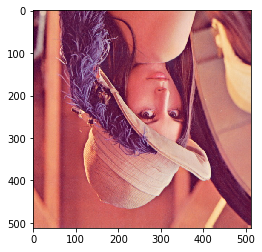

In [54]:
#뒤집기
img = cv2.imread('lena.jpg')
img2 = cv2.flip(img, 0)   #1은 좌우반전, 0은 상하반전
imshow("", img2)

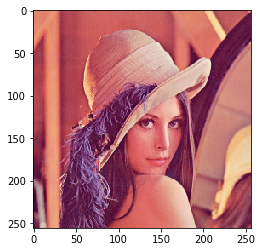

In [55]:
#확대/축소하기
img = cv2.imread('lena.jpg')

#원하는 사이즈(절대)로 줌하고 싶으면 ( , )로 줘도 되지만...
#zoom1 = cv2.resize(img, (200, 200), interpolation = cv2.INTER_CUBIC)  #interpolation = cv2.INTER_AREA

# None을 넘겨주고 fx, fy를 지정하면 상대적으로 확대/축소할 수 있음 -> 이미지 사이즈가 바뀌어도 상관없다는 장점이 있다
zoom2 = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)

imshow("", zoom2)

(200, 290, 3)


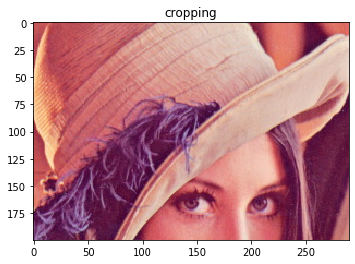

In [58]:
#자르기
cropping = img[100:300, 120:410]  #2차원이 아니라 3차원 크롭핑이다; 생략된 축은 모두 가져온다.
print(cropping.shape)

imshow("cropping", cropping)

(200, 290, 2)


error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 2


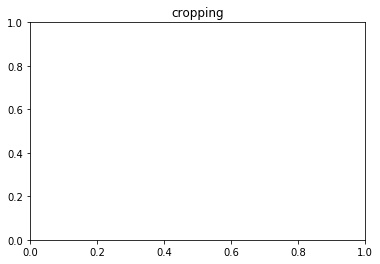

In [66]:
#자르기
cropping = img[100:300, 120:410, 0:2]  #b채널만 가져오기
print(cropping.shape)

imshow("cropping", cropping)

# `warpAffine`
- 이미지를 이동/회전/스케일링하는 메소드
     - 이미지를 리턴한다.
- cv2.warpAffine(이미지, 이동/회전매트릭스, (폭, 높이), borderValue = (B, G, R))
    - 이동/회전매트릭스
    - borderValue: 빈공간을 채울 색 (B, G, R) 값

[128 138 225]


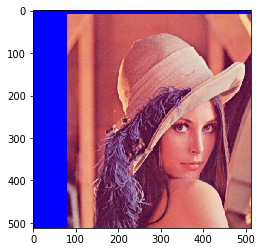

In [83]:
#이동하기
height, width = img.shape[:2]   #이미지 높이, 폭

#매트릭스를 생성해서 이동해줘야 한다.
M = np.float32([
    [1, 0, dx],   #x축으로 50만큼
    [0, 1, dy]])  #y축으로 20만큼

c = img[0, 0]  #첫픽셀
print(c)

dst = cv2.warpAffine(img, M, (width, height), borderValue = (255, 0, 0))
imshow("", dst)


[128 138 225]


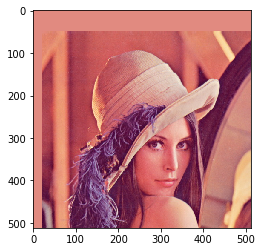

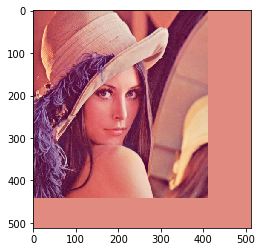

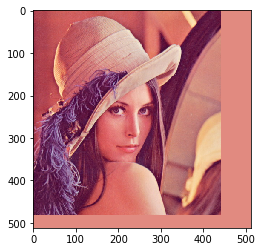

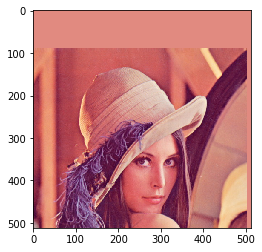

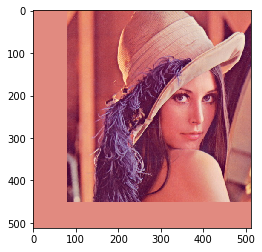

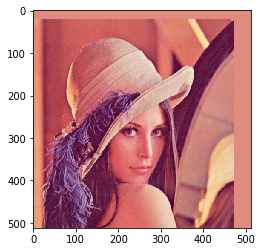

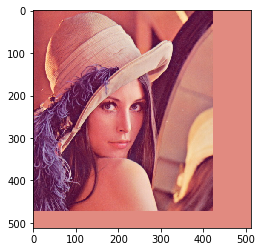

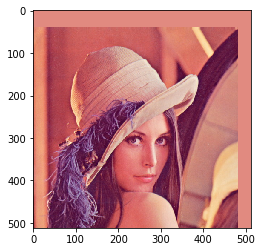

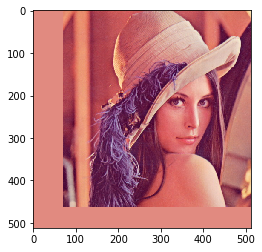

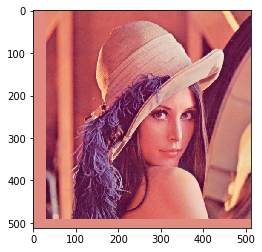

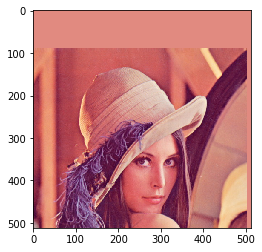

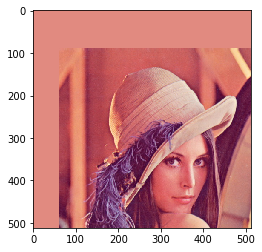

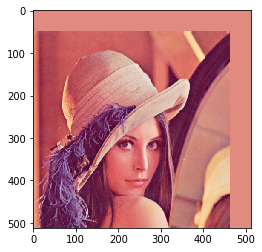

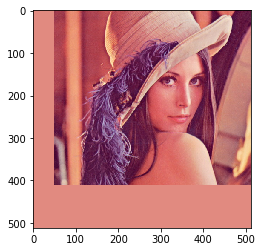

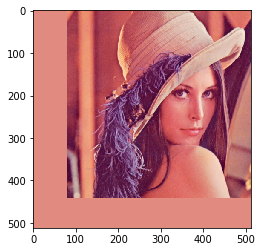

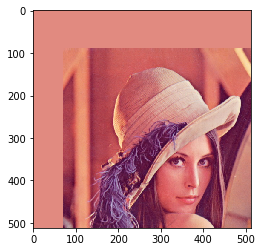

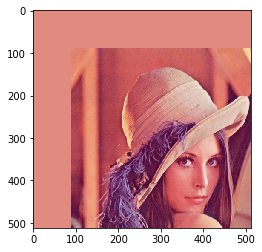

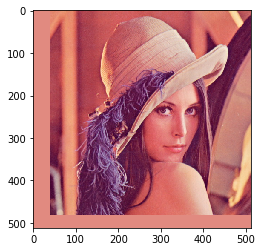

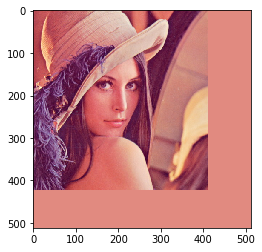

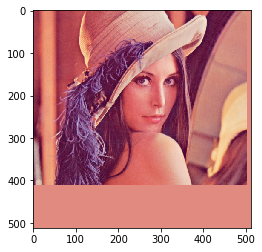

In [99]:
#이동하기
height, width = img.shape[:2]   #이미지 높이, 폭

c = img[0, 0]  #첫픽셀
print(c)

np.random.seed(0)
for _ in range(20):
    dx = 10 * np.random.randint(-10, 10)
    dy = 10 * np.random.randint(-10, 10)

    M = np.float32([
        [1, 0, dx],  
        [0, 1, dy]])
    
    dst = cv2.warpAffine(img, M, (width, height), borderValue = (int(c[0]), int(c[1]), int(c[2])))
    imshow("", dst)

가급적이면 행렬 형태로 한번에 처리하는 게 낫다
- 케라스, 텐서플로 등등: 데이터를 한번에 보내서 한번에 받아오기 때문에 for문을 돌면서 변수를 계속 생성해내는 것은 별로 좋지 않다.

[128 138 225]


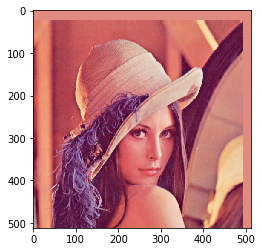

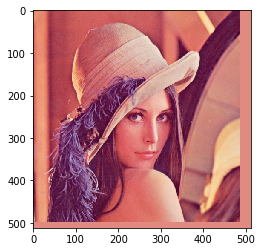

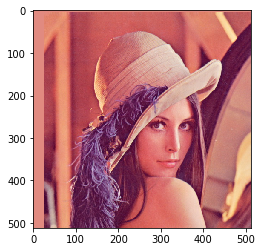

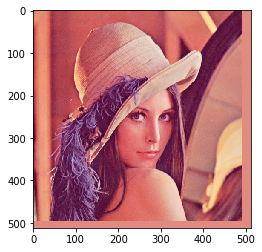

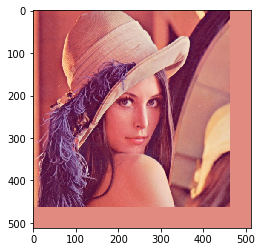

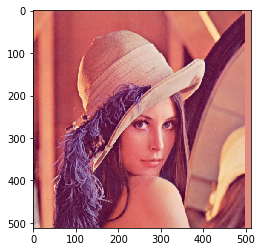

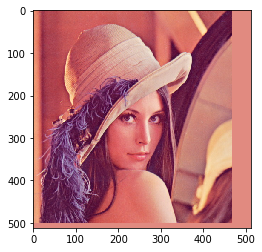

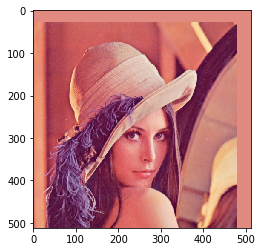

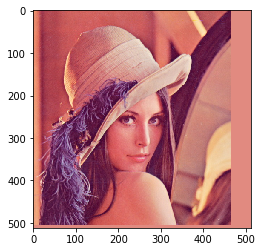

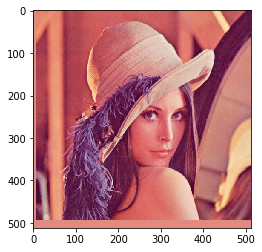

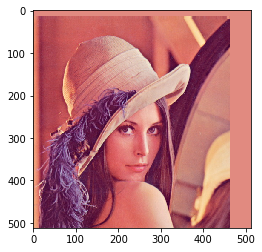

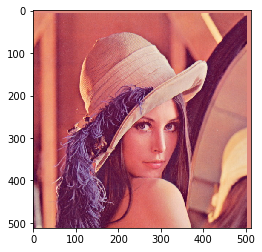

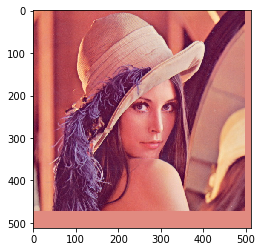

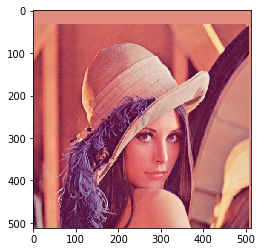

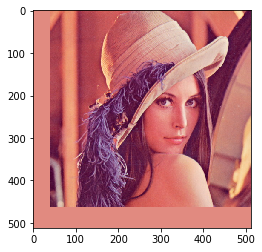

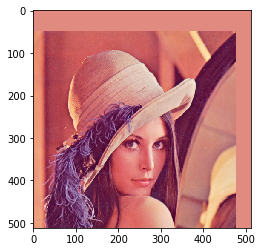

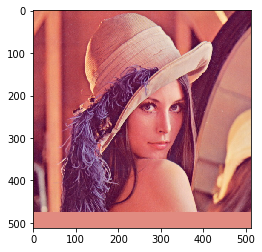

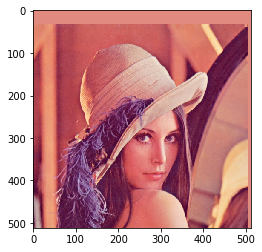

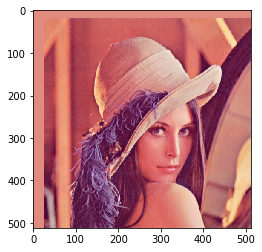

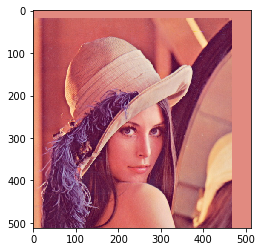

In [100]:
#솔루션 
height, width = img.shape[:2]   #이미지 높이, 폭

c = img[0, 0]  #첫픽셀
print(c)

dx = 50
r = np.random.randint(dx * 2, size = (20, 2)) - dx  #변수는 행렬 형태로 한꺼번에 만드는 데 익숙해져라

M = np.float32([
        [1, 0, dx],  
        [0, 1, dy]])

for p in r.tolist():                    #for문은 최대한 짧게
    M[:, 2] = p
    dst = cv2.warpAffine(img, M, (width, height), borderValue = (int(c[0]), int(c[1]), int(c[2])))
    imshow("", dst)

# `getRotationMatrix2D`
- 회전 매트릭스를 만드는 메소드
    - 매트릭스를 리턴한다.
- cv2.getRotationMatrix2D(회전중심, 회전각, 1.0)
    - 회전중심: (x, y) 좌표
    - 회전각: 시계반대방향으로 회전할 각도 (음수는 시계방향으로)
    - 1.0: 확대/축소값

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]
(512, 512, 3)


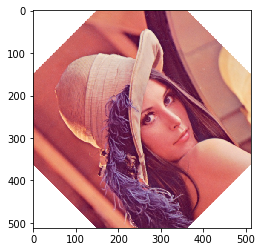

In [123]:
#회전하기
img = cv2.imread('lena.jpg')
height, width = img.shape[:2]
img_center = (width / 2, height / 2)
M = cv2.getRotationMatrix2D(img_center, 45, 1.0)
print(M)
rotated_image = cv2.warpAffine(img, M, (width, height), borderValue = (255, 255, 255))
print(rotated_image.shape)
imshow("", rotated_image)

[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]
(512, 512, 3)


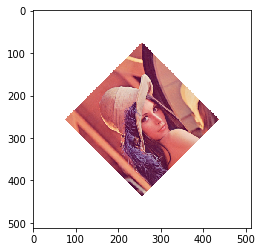

In [140]:
#회전하기 2
img = cv2.imread('lena.jpg')
height, width = img.shape[:2]
img_center = (width / 2, height / 2)
M = cv2.getRotationMatrix2D(img_center, 45, 0.5)  #마지막 파라미터 값으로 확대/축소 가능하다
print(M)
rotated_image = cv2.warpAffine(img, M, (width, height), borderValue = (255, 255, 255))
print(rotated_image.shape)
imshow("", rotated_image)

# `warpPerspective`
- 퍼스펙티브 변환을 수행하는 메소드이다.
- 리턴값은 이미지다.
- cv2.warpPerspective(이미지, 매트릭스, 크기)
    - 매트릭스: `getPerspectiveTransform` 메소드로 생성한다.
    - 크기: (폭, 높이)

# `getPerspectiveTransform`
- 퍼스펙티브 매트릭스를 생성하는 메소드
    - 원본에서 목표로 가려면 얼마만큼의 이동/회전/스케일변환이 필요한지 계산하는 메소드이다.
    - 리턴값은 매트릭스다.
- cv2.getPerspectiveTransform(원본좌표, 목표좌표)
    - 원본/목표 좌표는 다음과 같이 생성한다
        - pts = np.float32([[x1, y1], [x2, y2[, ...]])
        - pts = np.array([[x1, y1], [x2, y2[, ...]], dtype = 'float32')

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
[[  0.   0.]
 [811.   0.]
 [  0. 577.]
 [811. 577.]]
[[ 1.22316837e+00 -3.13544568e-01  2.30989317e+01]
 [ 4.53502840e-01  1.85206754e+00 -3.43764667e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


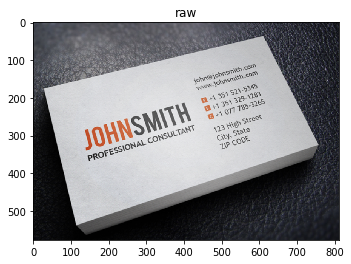

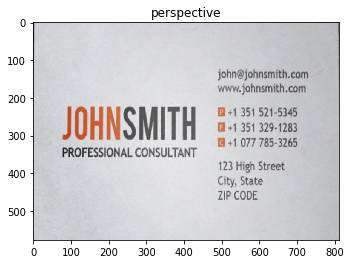

In [153]:
#퍼스펙티브
img = cv2.imread("namecard.png")

height, width = img.shape[:2]

#원본 이미지 꼭짓점: 상단왼쪽, 상단오른쪽, 하단왼쪽, 하단오른쪽; 그림판에서 매뉴얼하게 찾았다.
point_list = [[27, 179], [611, 36], [118, 534], [754, 325]]

#원본 점
pts1 = np.float32([list(point_list[0]),
                list(point_list[1]),
                list(point_list[2]),
                list(point_list[3])])
print(pts1)

#목적지 점
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
print(pts2)

#매트릭스 생성: getPerspectiveTransform 메소드
M = cv2.getPerspectiveTransform(pts1, pts2)  #pts1에서 pts2로 가려면 얼만큼의 이동/회전/스케일변환이 필요한지를 계산해줌
print(M)

#퍼스펙티브화
img_result = cv2.warpPerspective(img, M, (int(width), int(height)))
imshow("raw", img)
imshow("perspective", img_result)

### 원본 좌표 및 이미지 사이즈 자동화

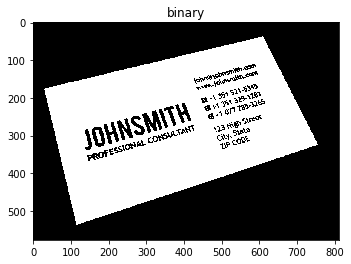

approx = 
 [[[609  38]]

 [[ 30 177]]

 [[115 536]]

 [[754 324]]]


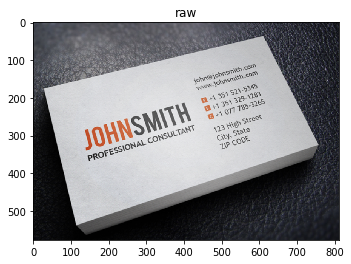

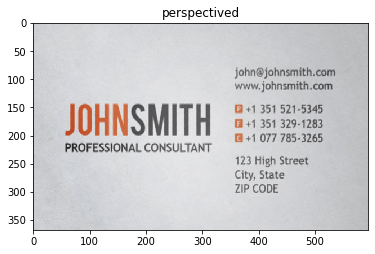

JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com
www. johnsmith.com

+1 351 521-5345
+1 351 329-1283
+1 077 785-3265

123 High Street
City, State
ZIP CODE


In [308]:
img = cv2.imread("namecard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width = img.shape[:2]

#원본 이미지 꼭짓점 --> 컨투어와 어프록시메이트 이용해서 찾기
_, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
imshow("binary", binary)

cnts, _ = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#사각형 추출
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:   #사각형인지 확인
        c_index = cnts.index(c)

approx = cv2.approxPolyDP(cnts[c_index], 0.02 * peri, True)

print(f"approx = \n {approx}")  #좌표 순서: 상단오른쪽, 상단왼쪽, 하단왼쪽, 하단오른쪽

#원본 점
pts1 = approx.astype('float32')

#원본 이미지의 크기로 퍼스펙티브화하기: 원본 꼭짓점 간 거리를 구해야 함
a, b, c, d = approx
width = np.linalg.norm(np.array(a)-np.array(b))
height = np.linalg.norm(np.array(b)-np.array(c))

#목적지 점
pts2 = np.float32([[width, 0], [0, 0], [0, height], [width, height]])

#매트릭스 생성: getPerspectiveTransform 메소드
M = cv2.getPerspectiveTransform(pts1, pts2)  #pts1에서 pts2로 가려면 얼만큼의 이동/회전/스케일변환이 필요한지를 계산해줌

#퍼스펙티브화
img_result = cv2.warpPerspective(img, M, (int(width), int(height)))
imshow("raw", img)
imshow("perspectived", img_result)

#글자까지 인식해보자
s = pytesseract.image_to_string(img_result)    #파일로 저장 안하고 ndarray로 넣어줘도 된다.
print(s)

진짜 잘 읽힌다....

In [312]:
img = cv2.imread('rcpt4.png')

# 예제) 영수증 이미지로 퍼스펙티브부터 글자인식까지

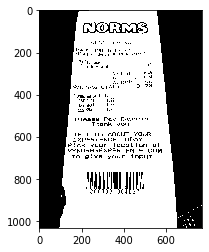

found 1


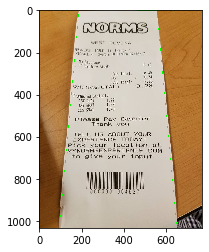

[[[ 189.    4.]]

 [[  97. 1031.]]

 [[ 654. 1032.]]

 [[ 559.    2.]]]


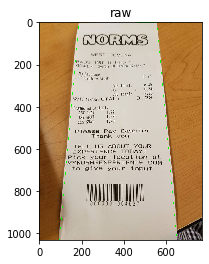

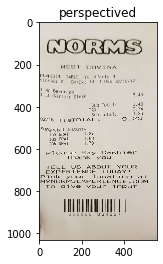

ORM

WEST COVINA

   

S463 TABLE 14 #Party 1
MICHAEL R SvrCk; 18 11:03a 02/16/17
1 No Bevera
ge
1 LC-Sirloin steak 8.49
Sub Total: 8.49
TAX § 0.74
. Sub Total: 9.23
02/16 1;:03aTO TAL : 9.523
Suggested Gratuity
15% GRAT 1.27
18% GRAT 1.53
20% GRAT 1.70

Please Pay Cashier
Thank you

TELL US ABOUT YOUR

EXPERIENCE TODAY!
Pick your location at
MY NORMSEXPERTIENCE .COM
to give your input

i

64637


In [327]:
img = cv2.imread('rcpt4.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

imshow("", binary)

cnts, _ = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total = 0
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    if len(approx) == 4:
        a, b, c, d = approx
        if np.linalg.norm(a-b) > 20:
            cv2.drawContours(img, [approx], -1, (0, 255, 0), 1)
            total += 1
            break
print(f"found {total}")
imshow("", img)

a, b, c, d = approx

#원본 점 좌표
pts1 = approx.astype('float32')
print(pts1)   #좌표 순서는 상단왼쪽, 하단왼쪽, 하단오른쪽, 상단왼쪽

#원본 이미지의 크기로 퍼스펙티브화하기: 원본 꼭짓점 간 거리를 구해야 함
a, b, c, d = approx
height = np.linalg.norm(np.array(a)-np.array(b))
width = np.linalg.norm(np.array(b)-np.array(c))

pts2 = np.float32([[0, height], [0, 0], [width, 0], [width, height]])
#매트릭스 생성:
M = cv2.getPerspectiveTransform(pts1, pts2)

#퍼스펙티브화
img_result = cv2.warpPerspective(img, M, (int(width), int(height)))
img_result = cv2.flip(img_result, 0)
imshow("raw", img)
imshow("perspectived", img_result)

#글자 인식
s = pytesseract.image_to_string(img_result)
print(s)

영어는 진짜 잘되는구나...............

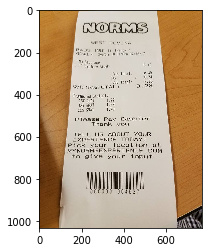

In [323]:
#Canny로 엣지 추출해서도 해보자
img = cv2.imread('rcpt4.png')
gray = 

# 덧; interpolation
> 확대/축소 시 채워넣을 값을 계산하는 알고리즘

- 우리의 기대와는 다른 방식이다.
    - 입력값을 기준으로 출력값을 계산하는 것이 아니라
    - 출력값을 입력값에 맵핑하여 구하는 방식으로 계산한다.
    - 즉, 입력 -> 출력 방식이 아닌 **출력 -> 입력** 방식의 연산이다.
- 그래서 역~~라고 부르기도 한다.

### 확대
- 인접 화소 보간법
    - 품질 저하....뭉툭한 이미지...
- **선형보간법**
> 인접 화소를 단순 복제하는 것이 아닌, 인접 화소끼리의 격차를 계산하여 선형적인 새로운 화소 도출

### 축소
- 따로 처리를 하지 않으면 선이 사라지는 문제가 발생한다
    - **블러링**을 수행한 후에 축소한다

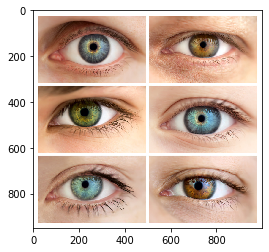

[[[265.5 164.5  68.1]
  [750.5 471.5  71.7]
  [232.5 752.5  77.2]
  [734.5 151.5  56.3]
  [344.5 459.5  54.1]
  [846.5 774.5  64. ]]]
6


In [138]:
#눈동자 인식

img = cv2.imread('eye.png')
imshow("", img)

img = cv2.medianBlur(img, 5)    #low level vision은 거의 항상 블러해줘야한다. 원래는 그레이로 바꾸고 블러하는 게 낫다(컬러로 할 필요가 없기 때문)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨


#원 찾아주는 전용 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 300, param1=100, param2=20, minRadius=50, maxRadius=80)
print(circles)
print(len(*circles))

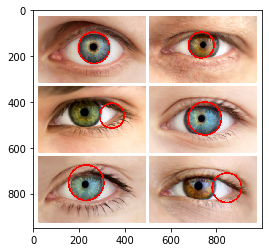

In [136]:
circles = np.uint16(np.around(circles))   #드로잉을 위해 16비트로 변환

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    #crop_img = img[y - r:y + r, x - r:x + r]    
    #txt, threshold = detect_weiqi(crop_img)
    
    #if txt == 'black' :  
        #cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)  #-1: 채우라는 뜻
    #else :
        #cv2.circle(img, (x, y),int(r*0.7), (255, 255, 255), -1)            


imshow("", img)